In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for chi-squared
from statsmodels.graphics.mosaicplot import mosaic # for mosaic plot

# Load the dataset
url = "https://data.nasa.gov/api/views/dd9e-wu2v/rows.csv?date=20241021&accessType=DOWNLOAD&bom=true&format=true"
data = pd.read_csv(url, sep=',')

data


,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395


In [60]:
#  #Exploratory Data Analysis & Transformation

# Convert 'event_date' to datetime objects
data['event_date'] = pd.to_datetime(data['event_date'])

# Extract month and year
data['month'] = data['event_date'].dt.month
data['year'] = data['event_date'].dt.year

data

<ipython-input-60-990b5bda39e0>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500,8,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000,1,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500,1,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800,7,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600,10,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",2017-04-01 13:34:00,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409,4,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",2017-03-25 17:32:00,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080,3,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",2016-12-15 05:00:00,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606,12,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",2017-04-29 19:03:00,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395,4,2017


In [61]:
data.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625,8,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200,1,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295,1,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378,7,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336,10,2010


In [62]:
data.dtypes

,0
source_name,object
source_link,object
event_id,object
event_date,datetime64[ns]
event_time,float64
event_title,object
event_description,object
location_description,object
location_accuracy,object
landslide_category,object


In [63]:
# Convert 'fatality_count' & 'injury_count' to integer, converting any blank spaces or strings to 0.

data['fatality_count'] = pd.to_numeric(data['fatality_count'], errors='coerce').fillna(0).astype(int)

data['injury_count'] = pd.to_numeric(data['injury_count'], errors='coerce').fillna(0).astype(int)



In [64]:
data.describe

<bound method NDFrame.describe of               source_name                                        source_link  \
0                     AGU  https://blogs.agu.org/landslideblog/2008/10/14...   
1               Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...   
2                CBS News  https://www.cbsnews.com/news/dozens-missing-af...   
3                 Reuters  https://in.reuters.com/article/idINIndia-41450...   
4             The Freeman  http://www.philstar.com/cebu-news/621414/lands...   
...                   ...                                                ...   
11028    The Jakarta Post  http://www.thejakartapost.com/news/2017/04/02/...   
11029     Greater Kashmir  http://www.greaterkashmir.com/news/jammu/lands...   
11030           NBC Daily  http://www.nbcdaily.com/separate-landslides-ki...   
11031  AGU Landslide Blog  http://blogs.agu.org/landslideblog/2017/05/02/...   
11032  The Times of India  https://timesofindia.indiatimes.com/city/hyder...   

      event_id          event_date  event_time  \
0          684 2008-08-01 00:00:00         NaN   
1          956 2009-01-02 02:00:00         NaN   
2          973 2007-01-19 00:00:00         NaN   
3        1,067 2009-07-31 00:00:00         NaN   
4        2,603 2010-10-16 12:00:00         NaN   
...        ...                 ...         ...   
11028   11,109 2017-04-01 13:34:00         NaN   
11029   10,845 2017-03-25 17:32:00         NaN   
11030   10,973 2016-12-15 05:00:00         NaN   
11031   10,901 2017-04-29 19:03:00         NaN   
11032   10,949 2017-03-13 14:32:00         NaN   

                                             event_title  \
0          Sigou Village, Loufan County, Shanxi Province   
1                                    Lake Oswego, Oregon   
2      San Ramon district, 195 miles northeast of the...   
3                                       Dailekh district   
4                        sitio Bakilid in barangay Lahug   
...                                                  ...   
11028                         Major landslide in Banaran   
11029                            Barnari Sigdi Landslide   
11030                      Landslide at Pub Sarania Hill   
11031                     Mayor landslide at Ayu village   
11032  Kondapur Commercial Complex Construction Mudslide   

                                       event_description  \
0      occurred early in morning, 11 villagers buried...   
1      Hours of heavy rain are to blame for an overni...   
2      (CBS/AP) At least 10 people died and as many a...   
3      One person was killed in Dailekh district, pol...   
4      Another landslide in sitio Bakilid in barangay...   
...                                                  ...   
11028  Landslide exacerbated by deforestation and bad...   
11029  Two teenage girls died after they were buried ...   
11030  An octogenarian was killed when a sudden lands...   
11031  Landslide triggered by heavy rainfall buried 1...   
11032  A mudslide at an under-construction commercial...   

                                    location_description location_accuracy  \
0          Sigou Village, Loufan County, Shanxi Province           unknown   
1                                    Lake Oswego, Oregon               5km   
2      San Ramon district, 195 miles northeast of the...              10km   
3                                       Dailekh district           unknown   
4                        sitio Bakilid in barangay Lahug               5km   
...                                                  ...               ...   
11028           Banaran, Ponorogo, Jawa Timur, Indonesia               5km   
11029  Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...               5km   
11030           Pub Sarania Hill, Guwahati, Assam, India               1km   
11031                        Ayu, Ozgon, Osh, Kyrgyzstan               1km   
11032                   Hyderabad, Rangareddy, Telangana               1km   

        landslide_categor

In [65]:
data.dtypes

,0
source_name,object
source_link,object
event_id,object
event_date,datetime64[ns]
event_time,float64
event_title,object
event_description,object
location_description,object
location_accuracy,object
landslide_category,object


In [66]:
# Ensure the required columns are present
required_columns = ['longitude', 'latitude', 'fatality_count']
if all(column in data.columns for column in required_columns):
    # Plot the map using Plotly
    fig = px.scatter_mapbox(data,
                            lat=data['latitude'],
                            lon=data['longitude'],
                            size=data['fatality_count'],
                            color=data['fatality_count'],
                            hover_name=data['fatality_count'],
                            size_max=15,
                            zoom=3,
                            mapbox_style="carto-positron")

    # Update the layout
    fig.update_layout(title='Map of Fatalities',
                      mapbox=dict(center=dict(lat=0, lon=0), zoom=2))

    fig.show()
else:
    print(f"Data does not contain required columns: {required_columns}")

mapbox_style (str (default 'basic', needs Mapbox API token)) – Identifier of base map style, some of which require a Mapbox or Stadia Maps API token to be set using plotly.express.set_mapbox_access_token(). Allowed values which do not require a token are 'open-street-map', 'white-bg', 'carto- positron', 'carto-darkmatter'. Allowed values which require a Mapbox API token are 'basic', 'streets', 'outdoors', 'light', 'dark', 'satellite', 'satellite-streets'. Allowed values which require a Stadia Maps API token are 'stamen-terrain', 'stamen- toner', 'stamen-watercolor'.

In [52]:
# Ensure the required columns are present
required_columns = ['longitude', 'latitude', 'injury_count']
if all(column in data.columns for column in required_columns):
    # Plot the map using Plotly
    fig = px.scatter_mapbox(data,
                            lat=data['latitude'],
                            lon=data['longitude'],
                            size=data['injury_count'],
                            color=data['injury_count'],
                            hover_name=data['injury_count'],
                            size_max=15,
                            zoom=3,
                            mapbox_style="carto-darkmatter")


    # Update the layout
    fig.update_layout(title='Map of Injuries',
                      mapbox=dict(center=dict(lat=0, lon=0), zoom=2))

    fig.show()
else:
    print(f"Data does not contain required columns: {required_columns}")

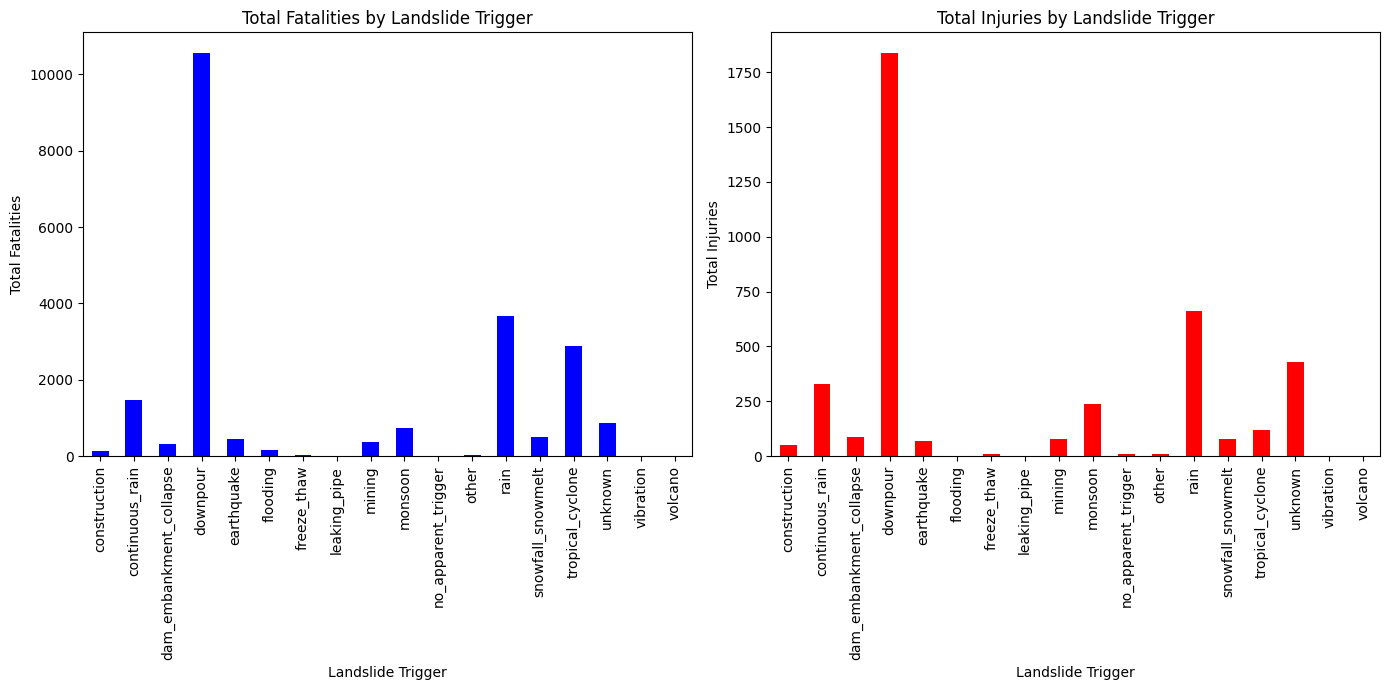

In [53]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(14, 7))

# Fatality count histogram
plt.subplot(1, 2, 1)
data.groupby('landslide_trigger')['fatality_count'].sum().plot(kind='bar', color='blue')
plt.title('Total Fatalities by Landslide Trigger')
plt.xlabel('Landslide Trigger')
plt.ylabel('Total Fatalities')

# Injury count histogram
plt.subplot(1, 2, 2)
data.groupby('landslide_trigger')['injury_count'].sum().plot(kind='bar', color='red')
plt.title('Total Injuries by Landslide Trigger')
plt.xlabel('Landslide Trigger')
plt.ylabel('Total Injuries')

plt.tight_layout()
plt.show()


Out of the above reasons specifically downpour/rain seems to be the major causes, so further refining below and

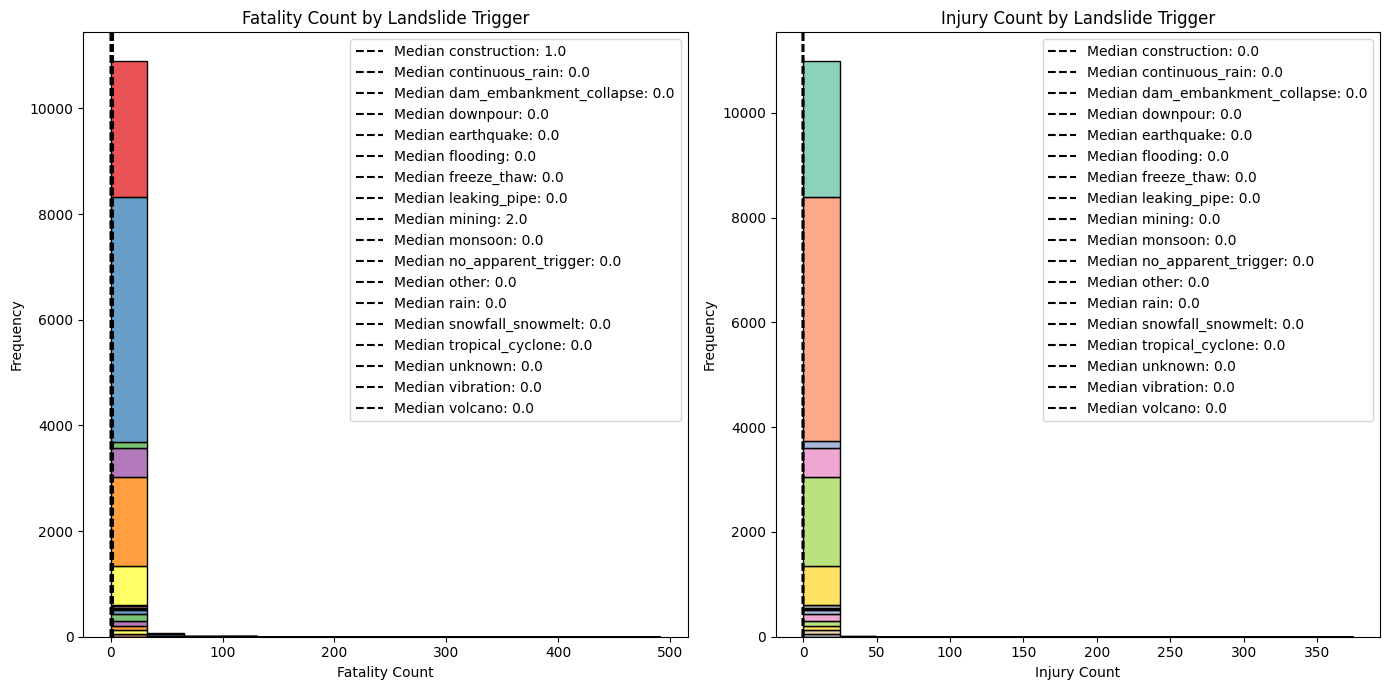

In [55]:

# Create a Seaborn plot
plt.figure(figsize=(14, 7))

# Fatality count histogram
plt.subplot(1, 2, 1)
sns.histplot(data, x='fatality_count', hue='landslide_trigger', multiple='stack', palette='Set1')
median_fatality = data.groupby('landslide_trigger')['fatality_count'].median()
for trigger, median_value in median_fatality.items():
    plt.axvline(median_value, linestyle='--', label=f'Median {trigger}: {median_value}', color='black')
plt.title('Fatality Count by Landslide Trigger')
plt.xlabel('Fatality Count')
plt.ylabel('Frequency')
plt.legend()

# Injury count histogram
plt.subplot(1, 2, 2)
sns.histplot(data, x='injury_count', hue='landslide_trigger', multiple='stack', palette='Set2')
median_injury = data.groupby('landslide_trigger')['injury_count'].median()
for trigger, median_value in median_injury.items():
    plt.axvline(median_value, linestyle='--', label=f'Median {trigger}: {median_value}', color='black')
plt.title('Injury Count by Landslide Trigger')
plt.xlabel('Injury Count')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


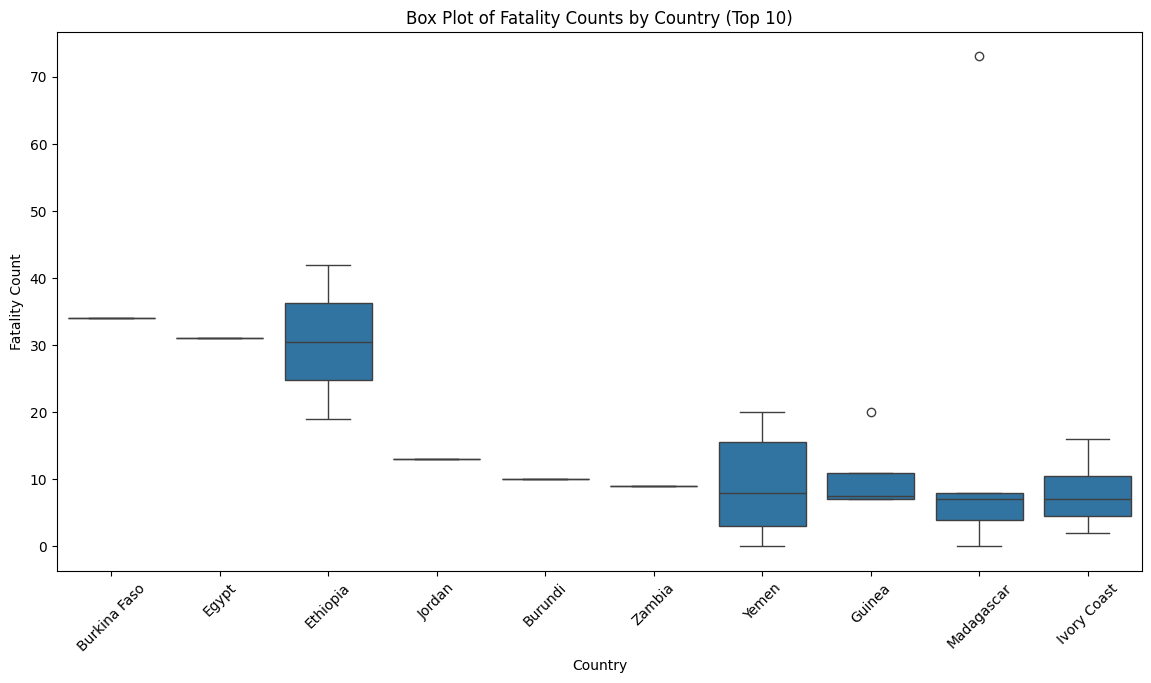

In [56]:

# Calculate the median fatality count by country
median_fatality = data.groupby('country_name')['fatality_count'].median().sort_values(ascending=False).head(10)

# Filter data for the top 10 countries
top_countries = median_fatality.index
top_data = data[data['country_name'].isin(top_countries)]

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='country_name', y='fatality_count', data=top_data, order=top_countries)
plt.title('Box Plot of Fatality Counts by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Fatality Count')
plt.xticks(rotation=45)
plt.show()


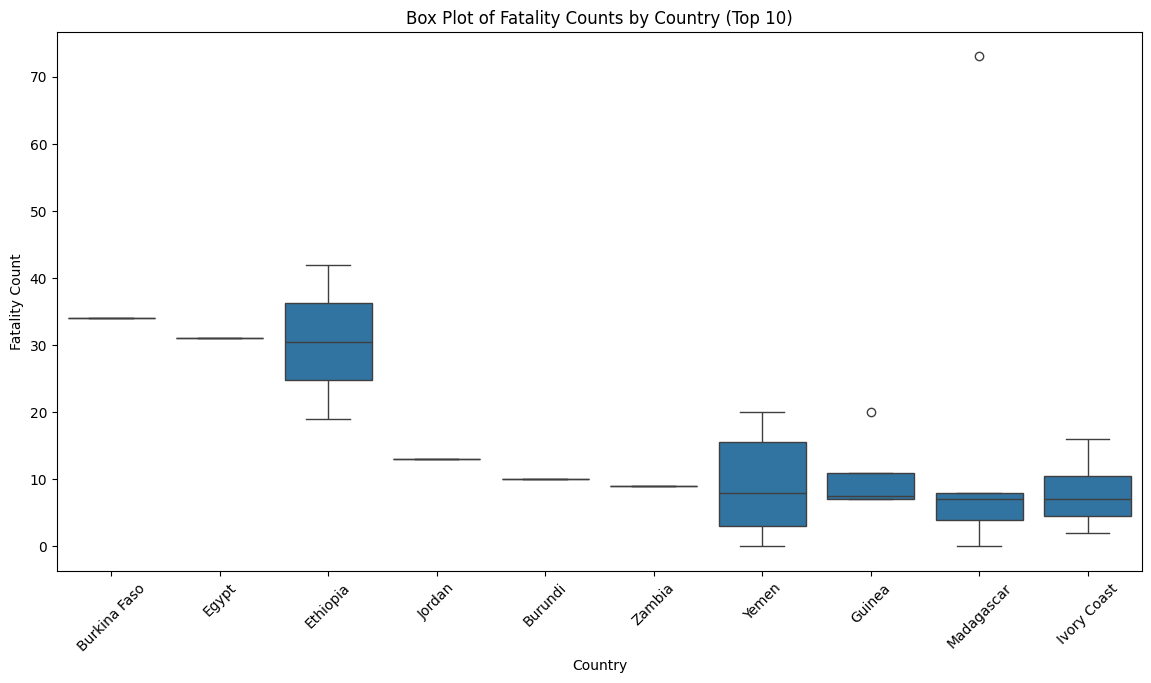

In [67]:

# Calculate the median fatality count by country
median_fatality = data.groupby('country_name')['fatality_count'].median().sort_values(ascending=False).head(10)

# Filter data for the top 10 countries
top_countries = median_fatality.index
top_data = data[data['country_name'].isin(top_countries)]

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='country_name', y='fatality_count', data=top_data, order=top_countries)
plt.title('Box Plot of Fatality Counts by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Fatality Count')
plt.xticks(rotation=45)
plt.show()


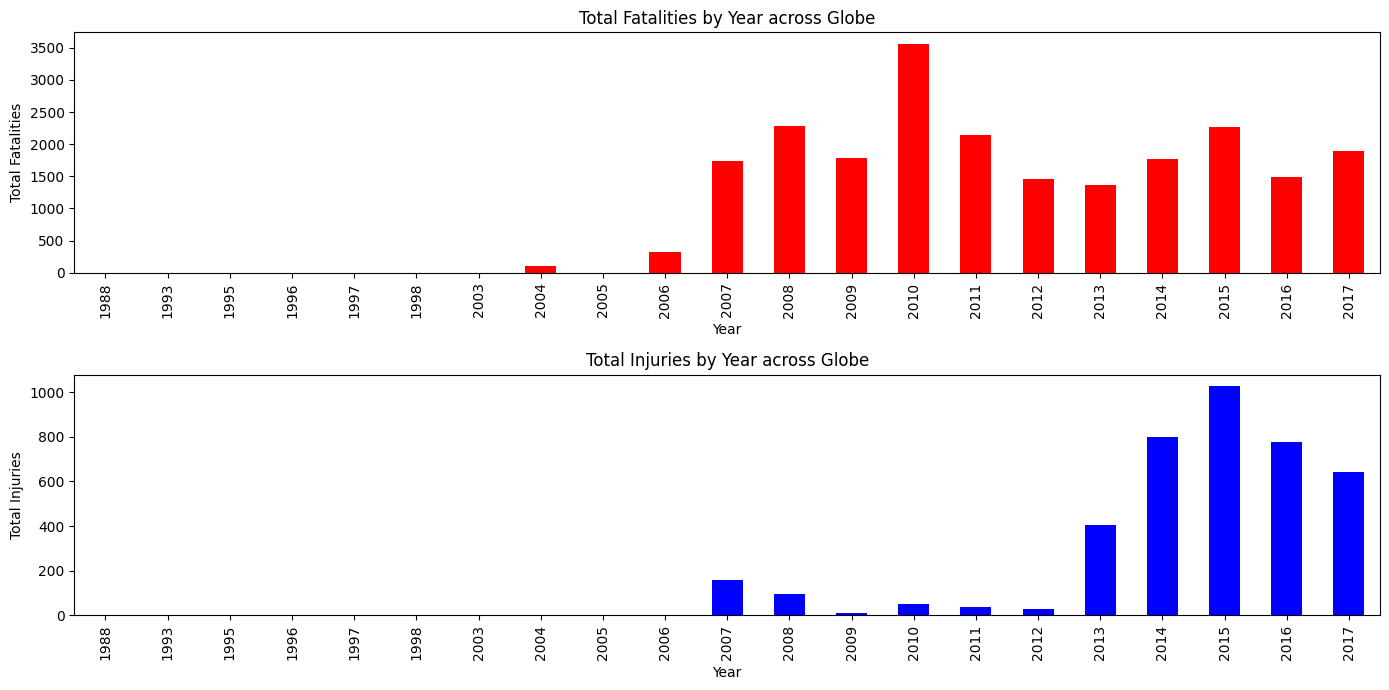

In [69]:
# Produce histograms and frequency distributions
plt.figure(figsize=(14, 7))

# Fatality count histogram
plt.subplot(2, 1, 1)
data.groupby('year')['fatality_count'].sum().plot(kind='bar', color='red')
plt.title('Total Fatalities by Year across Globe')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

# Injury count histogram
plt.subplot(2, 1, 2)
data.groupby('year')['injury_count'].sum().plot(kind='bar', color='blue')
plt.title('Total Injuries by Year across Globe')
plt.xlabel('Year')
plt.ylabel('Total Injuries')

plt.tight_layout()
plt.show()

In [95]:

# Convert 'event_date' to datetime format and extract year
data['event_date'] = pd.to_datetime(data['event_date'], format='%Y-%m-%d', errors='coerce')
data['year'] = data['event_date'].dt.year


# Filter the dataset for country_code as 'IN'
india_data = data[data['country_code'] == 'IN']

india_data
india_data.dtypes


,0
source_name,object
source_link,object
event_id,object
event_date,datetime64[ns]
event_time,float64
event_title,object
event_description,object
location_description,object
location_accuracy,object
landslide_category,object


In [104]:

# Delete rows where 'year' is blank or null for india_data
india_data = india_data.dropna(subset=['year'])
india_data = india_data[india_data['year'].astype(str) != '']

# Data Cleansing as many rows are available with a umlaut
# Update column to replace 'ā' with 'a'
india_data['admin_division_name'] = india_data['admin_division_name'].str.replace('ā', 'a')

# Drop rows with NaN values
#india_data = india_data.dropna()
india_data


# Remove rows where 'admin_division_name' is NaN
india_data = india_data.dropna(subset=['admin_division_name'])

india_data



,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,"1,055",2009-07-22 00:00:00,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,...,"46,427",Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600,7,2009
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,"1,054",2009-07-22 00:00:00,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,...,"46,427",Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200,7,2009
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,"2,164",2010-07-29 23:00:00,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,...,"15,118",Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863,7,2010
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,"3,821",2011-07-21 00:00:00,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,...,"32,442",Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400,7,2011
66,Tribune India.com,NaN,37,2007-03-19 00:00:00,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,...,"14,711",Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.877800,3,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,headlinesindia,http://www.headlinesindia.com/natural-disaster...,"1,030",2009-05-26 00:00:00,NaN,"Darjeeling Sadar, Darjeeling West Bengal","With the recovery of three more bodies, the to...","Darjeeling Sadar, Darjeeling West Bengal",25km,landslide,...,"123,797",Dārjiling,0.79891,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.265221,27.043571,5,2009
9852,www.greaterkashmir.com,http://www.greaterkashmir.com/news/2013/Jun/12...,"4,913",2013-06-11 23:00:00,NaN,"Srinagar-Jammu Highway, Ramban District",While pre-monsoon showers brought much needed ...,"Srinagar-Jammu Highway, Ramban District",unknown,landslide,...,"6,690",Ghumārwīn,6.68727,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,76.670200,31.488100,6,2013
9859,The Times of India,http://timesofindia.indiatimes.com/city/dehrad...,"7,294",2015-07-24 00:00:00,NaN,Kempty Road near Kempty Falls,"two more landslides occurred since Friday, one...",Kempty Road near Kempty Falls,25km,landslide,...,"25,753",Mussoorie,15.12471,07/29/2015 06:47:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,78.104500,30.452800,7,2015
9865,ibnlive.in,http://ibnlive.in.com/news/crops-worth-rs-185-...,"3,566",2011-06-02 00:00:00,NaN,"Munnar, Idukki district, Kerala","Jun 05, 2011 at 12:04pm IST KATTAPPANA: The h...","Munnar, Idukki district, Kerala",10km,landslide,...,"68,000",Munnar,0.93276,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,77.069600,10.083800,6,2011


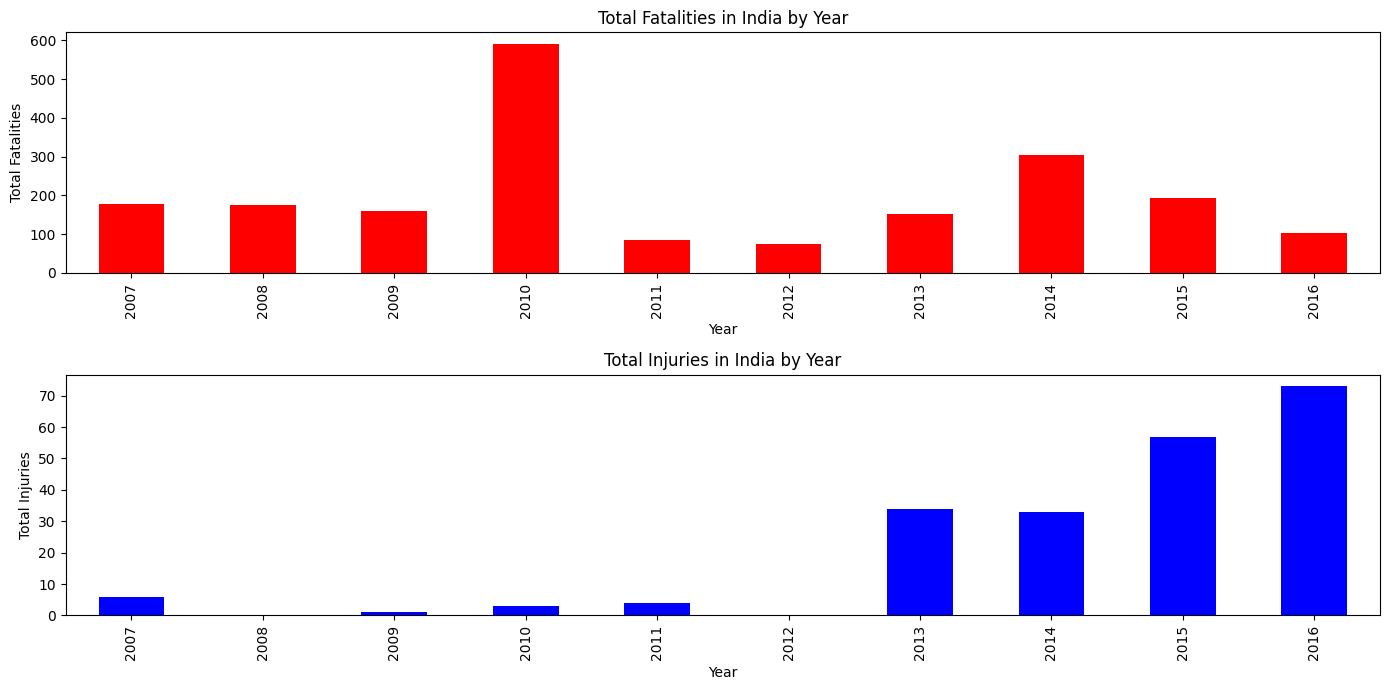

In [107]:
# Produce histograms and frequency distributions by year
plt.figure(figsize=(14, 7))

# Fatality count histogram
plt.subplot(2, 1, 1)
india_data.groupby('year')['fatality_count'].sum().plot(kind='bar', color='red')
plt.title('Total Fatalities in India by Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

# Injury count histogram
plt.subplot(2, 1, 2)
india_data.groupby('year')['injury_count'].sum().plot(kind='bar', color='blue')
plt.title('Total Injuries in India by Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries')

plt.tight_layout()
plt.show()

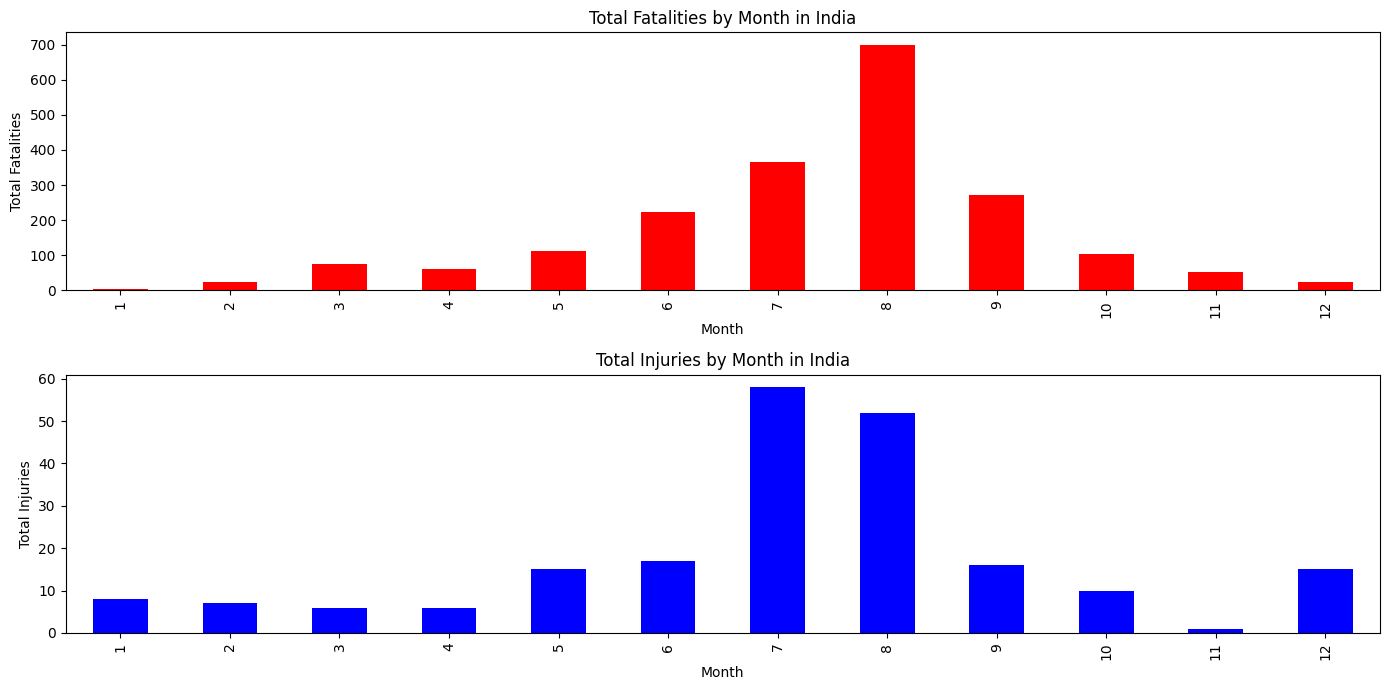

In [106]:
# Produce histograms and frequency distributions
plt.figure(figsize=(14, 7))

# Fatality count histogram
plt.subplot(2, 1, 1)
india_data.groupby('month')['fatality_count'].sum().plot(kind='bar', color='red')
plt.title('Total Fatalities by Month in India')
plt.xlabel('Month')
plt.ylabel('Total Fatalities')

# Injury count histogram
plt.subplot(2, 1, 2)
india_data.groupby('month')['injury_count'].sum().plot(kind='bar', color='blue')
plt.title('Total Injuries by Month in India')
plt.xlabel('Month')
plt.ylabel('Total Injuries')

plt.tight_layout()
plt.show()

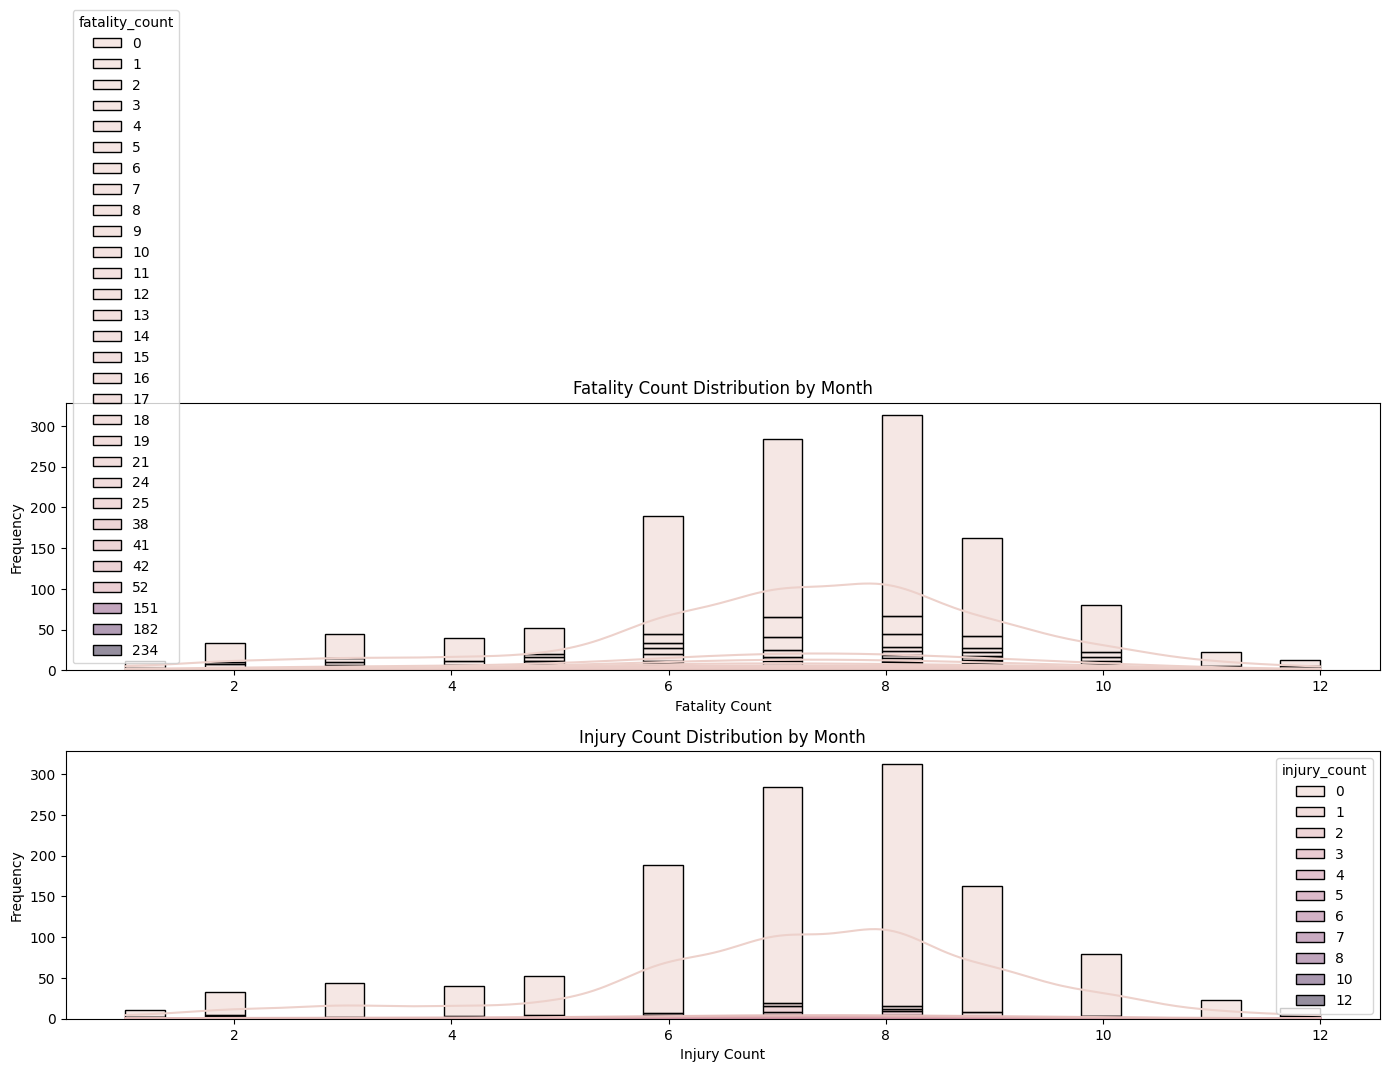

In [108]:

# Function to calculate 95% confidence interval
def conf_interval(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean, ci

# Initialize plot
plt.figure(figsize=(14, 10))

# Fatality count
plt.subplot(2, 1, 1)
sns.histplot(data=india_data, x='month', hue='fatality_count', multiple='stack', kde=True)
mean_fatality, ci_fatality = conf_interval(india_data['fatality_count'])
#plt.axvline(mean_fatality, color='r', linestyle='--', label=f'Mean: {mean_fatality:.2f}')
#plt.axvline(np.median(india_data['fatality_count']), color='g', linestyle='-', label=f'Median: {np.median(india_data['fatality_count']):.2f}')
#plt.fill_betweenx(y=[0, max(india_data['fatality_count'])], x1=ci_fatality[0], x2=ci_fatality[1], color='r', alpha=0.1, label='95% CI')
plt.title('Fatality Count Distribution by Month')
plt.xlabel('Fatality Count')
plt.ylabel('Frequency')
#plt.legend()

# Injury count
plt.subplot(2, 1, 2)
sns.histplot(data=india_data, x='month', hue='injury_count', multiple='stack', kde=True)
mean_injury, ci_injury = conf_interval(india_data['injury_count'])
#plt.axvline(mean_injury, color='r', linestyle='--', label=f'Mean: {mean_injury:.2f}')
#plt.axvline(np.median(india_data['injury_count']), color='g', linestyle='-', label=f'Median: {np.median(india_data['injury_count']):.2f}')
#plt.fill_betweenx(y=[0, max(india_data['injury_count'])], x1=ci_injury[0], x2=ci_injury[1], color='r', alpha=0.1, label='95% CI')
plt.title('Injury Count Distribution by Month')
plt.xlabel('Injury Count')
plt.ylabel('Frequency')
#plt.legend()

plt.tight_layout()
plt.show()



In [97]:
india_data.dtypes

,0
source_name,object
source_link,object
event_id,object
event_date,datetime64[ns]
event_time,float64
event_title,object
event_description,object
location_description,object
location_accuracy,object
landslide_category,object


In [93]:
india_data['fatality_count'].describe()

,fatality_count
count,1265.000000
mean,1.635573
std,10.080334
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,234.000000


In [93]:
# Calculate the correlation between fatalities and injury
correlation = data[['fatality_count', 'injury_count']].corr().iloc[0, 1]
print(f"Correlation between fatalities and Injury: {correlation:.4f}")

Correlation between fatalities and Injury: 0.3040


In [95]:
# Replace 'ā' with 'a' in 'admin_division_name'
india_data['admin_division_name'] = india_data['admin_division_name'].str.replace('ā', 'a')

# Group by 'admin_division_name' and 'year' to get the sum of 'fatality_count'
grouped_data = india_data.groupby(['admin_division_name', 'year'])['fatality_count'].sum().reset_index()

# Create a 3D plot
fig = px.scatter_3d(grouped_data, x='year', y='admin_division_name', z='fatality_count',
                    color='fatality_count', title='3D Frequency Distribution of Fatality Count by Admin Division and Year in India')

fig.show()

The State of **Jammu & Kashmir ** (J&K) seems to be severe outlier, well, it needs special attention by the Government (Govt.,) of India (GOI.,)., Our datasets exists only after 2008 however there was a [massive earthquake triggered Landslide which happend on 2005](https://www.sciencedirect.com/science/article/abs/pii/S1367912016300025) was not taken into consideration



In [109]:
# Group by 'admin_division_name' and 'year' to get the sum of 'fatality_count'
grouped_data = india_data.groupby(['admin_division_name', 'year'])['fatality_count'].sum().reset_index()

# Sort and get top 5 per year
top_5_per_year = grouped_data.groupby('year').apply(lambda x: x.nlargest(5, 'fatality_count')).reset_index(drop=True)

# Display the table
print(top_5_per_year)

# Create a sunburst chart
fig = px.sunburst(grouped_data, path=['year', 'admin_division_name'], values='fatality_count',
                  title='Sunburst Chart of Fatality Count by Year and Admin Division in India')


fig.show()



   admin_division_name  year  fatality_count
0            Rajasthan  2007              52
1              Kashmir  2007              27
2          Maharashtra  2007              21
3               Bengal  2007              19
4     Himachal Pradesh  2007              13
5     Himachal Pradesh  2008              70
6    Arunachal Pradesh  2008              33
7                Assam  2008              29
8              Kashmir  2008              17
9          Uttarakhand  2008              14
10              Bengal  2009              46
11          Tamil Nadu  2009              43
12           Karnataka  2009              24
13         Maharashtra  2009              21
14         Uttarakhand  2009              18
15             Kashmir  2010             435
16         Uttarakhand  2010              57
17   Arunachal Pradesh  2010              44
18         Maharashtra  2010              31
19               Assam  2010               6
20         Uttarakhand  2011              25
21        

<ipython-input-109-c91638c0fc95>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Assumption **

out of the below landslide trigger assuming, continuous rain, downpour, flooding, snowmelt, monsoon, rain as rain category only for comparison.

Excluding unknown and mining for better assessment


In [110]:
# Group by 'admin_division_name' 'landslide_trigger' and 'year' to get the sum of 'fatality_count'
grouped_data = india_data.groupby(['landslide_trigger','admin_division_name', 'year'])['fatality_count'].sum().reset_index()

# Sort and get top 5 per year
top_5_per_year = grouped_data.groupby('year').apply(lambda x: x.nlargest(5, 'fatality_count')).reset_index(drop=True)

# Display the table
print(top_5_per_year)

# Create a sunburst chart
fig = px.sunburst(grouped_data, path=['year', 'landslide_trigger', 'admin_division_name'], values='fatality_count',
                  title='Sunburst Chart of Fatality Count by Year and Admin Division (State) in India with insights on Landslide Trigger')


fig.show()

    landslide_trigger admin_division_name  year  fatality_count
0            downpour           Rajasthan  2007              52
1                rain         Maharashtra  2007              21
2                rain              Bengal  2007              19
3                rain             Kashmir  2007              17
4                rain    Himachal Pradesh  2007              13
5            downpour    Himachal Pradesh  2008              44
6   snowfall_snowmelt    Himachal Pradesh  2008              25
7            downpour               Assam  2008              24
8                rain   Arunachal Pradesh  2008              21
9                rain         Uttarakhand  2008              14
10           downpour          Tamil Nadu  2009              43
11   tropical_cyclone              Bengal  2009              27
12           downpour           Karnataka  2009              24
13           downpour         Maharashtra  2009              20
14           downpour         Uttarakhan

<ipython-input-110-4afc5ec84628>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Assumption **

out of the below landslide trigger assuming, continuous rain, downpour, flooding, snowmelt, monsoon, rain as rain category only for comparison

Excluding construction, unknown and mining for better assessment as the Local bodies can handle better on the Governance

In [32]:
# Define a list of triggers to be renamed to 'rain'
rain_triggers = ['continuous_rain', 'downpour', 'flooding', 'snowfall_snowmelt', 'monsoon', 'rain', 'tropical_cyclone']

# Replace the triggers in 'landslide_trigger' with 'rain'
india_data['landslide_trigger'] = india_data['landslide_trigger'].replace(rain_triggers, 'rain')

# Display the updated DataFrame
print(india_data[['landslide_trigger', 'fatality_count']].head())

   landslide_trigger  fatality_count
32              rain               0
34              rain               0
45              rain               0
59              rain               0
62              rain               1


Contingency Table:
fatality_count     0    1    2    3    4    5    6    7    8    9    ...  21   \
landslide_trigger                                                    ...        
construction         5    4    0    0    1    1    0    0    0    0  ...    0   
continuous_rain    137   13   12    8    3    4    0    1    1    0  ...    0   
downpour           513   46   24   13   16    9    7    2    3    1  ...    0   
flooding             1    0    0    0    0    0    0    0    0    0  ...    0   
mining               2    1    3    1    0    2    0    0    0    0  ...    0   
monsoon             31    7    4    1    1    1    0    0    0    0  ...    0   
other                1    0    0    0    0    0    0    0    0    0  ...    0   
rain               182   20   11    8    1    1    3    3    3    0  ...    1   
snowfall_snowmelt    8    1    0    0    0    0    0    0    0    0  ...    0   
tropical_cyclone     2    0    1    0    1    1    1    1    0    0  ...    0   
unknown  

<Figure size 1400x700 with 0 Axes>

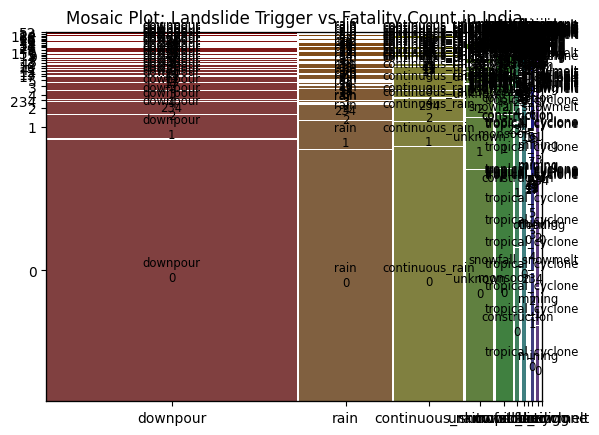

In [111]:
# Create contingency table
contingency_table = pd.crosstab(india_data['landslide_trigger'], india_data['fatality_count'])

print("Contingency Table:")
print(contingency_table)

# Conduct the chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Create a mosaic plot
plt.figure(figsize=(14, 7))
mosaic(india_data, ['landslide_trigger', 'fatality_count'], title='Mosaic Plot: Landslide Trigger vs Fatality Count in India')
plt.show()

In [40]:
# List unique admin_division_name
unique_admin_divisions = india_data['admin_division_name'].unique()
print(unique_admin_divisions)

['Bengal' nan 'Manipur' 'Uttarakhand' 'Kashmir' 'Himachal Pradesh'
 'Tamil Nadu' 'Nagaland' 'Goa' 'Karnataka' 'Kerala' 'Maharashtra' 'Assam'
 'Meghalaya' 'Sikkim' 'Madhya Pradesh' 'Arunachal Pradesh' 'Mizoram'
 'State of Odisha' 'West Bengal' 'Andhra Pradesh' 'Gujarat' 'Rajasthan'
 'Odisha' 'Uttar Pradesh' 'Tripura' 'Bihar' 'NCT' 'Haryana' 'Orissa'
 'Jharkhand' 'Telangana' 'Andaman and Nicobar Islands']


In [112]:
#Merge unique_admin_divisions such as 'State of Odisha' , 'Orissa', 'Odisha'  as 'Odisha'

# List unique admin_division_name
unique_admin_divisions = india_data['admin_division_name'].unique()

# Create a dictionary to map variations to the preferred name
admin_division_mapping = {
    'State of Odisha': 'Odisha',
    'Orissa': 'Odisha',
    'Odisha': 'Odisha',
    # Add more mappings as needed
}
# Update column to replace 'ā' with 'a'
india_data['admin_division_name'] = india_data['admin_division_name'].str.replace('ā', 'a')

# Replace variations with the preferred name
india_data['admin_division_name'] = india_data['admin_division_name'].replace(admin_division_mapping)

# Verify the changes
unique_admin_divisions_after_mapping = india_data['admin_division_name'].unique()
print(unique_admin_divisions_after_mapping)

['Bengal' 'Manipur' 'Uttarakhand' 'Kashmir' 'Himachal Pradesh'
 'Tamil Nadu' 'Nagaland' 'Goa' 'Karnataka' 'Kerala' 'Maharashtra' 'Assam'
 'Meghalaya' 'Sikkim' 'Madhya Pradesh' 'Arunachal Pradesh' 'Mizoram'
 'Odisha' 'West Bengal' 'Andhra Pradesh' 'Gujarat' 'Rajasthan'
 'Uttar Pradesh' 'Tripura' 'Bihar' 'NCT' 'Haryana' 'Jharkhand' 'Telangana'
 'Andaman and Nicobar Islands']


In [113]:
# prompt: remove nan from the above admin_division_name

# Drop rows with NaN values in 'admin_division_name'
india_data = india_data.dropna(subset=['admin_division_name'])

# Remove rows where 'admin_division_name' is NaN
india_data = india_data.dropna(subset=['admin_division_name'])

india_data

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,month,year
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,"1,055",2009-07-22 00:00:00,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,...,"46,427",Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600,7,2009
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,"1,054",2009-07-22 00:00:00,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,...,"46,427",Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200,7,2009
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,"2,164",2010-07-29 23:00:00,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,...,"15,118",Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863,7,2010
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,"3,821",2011-07-21 00:00:00,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,...,"32,442",Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400,7,2011
66,Tribune India.com,NaN,37,2007-03-19 00:00:00,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,...,"14,711",Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.877800,3,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,headlinesindia,http://www.headlinesindia.com/natural-disaster...,"1,030",2009-05-26 00:00:00,NaN,"Darjeeling Sadar, Darjeeling West Bengal","With the recovery of three more bodies, the to...","Darjeeling Sadar, Darjeeling West Bengal",25km,landslide,...,"123,797",Dārjiling,0.79891,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.265221,27.043571,5,2009
9852,www.greaterkashmir.com,http://www.greaterkashmir.com/news/2013/Jun/12...,"4,913",2013-06-11 23:00:00,NaN,"Srinagar-Jammu Highway, Ramban District",While pre-monsoon showers brought much needed ...,"Srinagar-Jammu Highway, Ramban District",unknown,landslide,...,"6,690",Ghumārwīn,6.68727,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,76.670200,31.488100,6,2013
9859,The Times of India,http://timesofindia.indiatimes.com/city/dehrad...,"7,294",2015-07-24 00:00:00,NaN,Kempty Road near Kempty Falls,"two more landslides occurred since Friday, one...",Kempty Road near Kempty Falls,25km,landslide,...,"25,753",Mussoorie,15.12471,07/29/2015 06:47:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,78.104500,30.452800,7,2015
9865,ibnlive.in,http://ibnlive.in.com/news/crops-worth-rs-185-...,"3,566",2011-06-02 00:00:00,NaN,"Munnar, Idukki district, Kerala","Jun 05, 2011 at 12:04pm IST KATTAPPANA: The h...","Munnar, Idukki district, Kerala",10km,landslide,...,"68,000",Munnar,0.93276,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,77.069600,10.083800,6,2011


In [121]:

# Provided state-wise normal rainfall data
state_rainfall_data = {
    'state': ['Bengal', 'Manipur', 'Uttarakhand', 'Kashmir', 'Himachal Pradesh', 'Tamil Nadu',
              'Nagaland', 'Goa', 'Karnataka', 'Kerala', 'Maharashtra', 'Assam', 'Meghalaya',
              'Sikkim', 'Madhya Pradesh', 'Arunachal Pradesh', 'Mizoram', 'Odisha',
              'West Bengal', 'Andhra Pradesh', 'Gujarat', 'Rajasthan', 'Uttar Pradesh',
              'Tripura', 'Bihar', 'NCT', 'Haryana', 'Jharkhand', 'Telangana',
              'Andaman and Nicobar Islands'],
    'state_normal_rain_mm': [1772.9, 1623, 1477.6, 1232.3, 1245.1, 919.8, 1557.1, 3279.6, 1131.6,
                             2890.8, 1124.9, 2220.7, 3751.5, 2570.1, 1040.4, 914.9, 2465, 1444.7,
                             1772.9, 914.9, 747.5, 486.6, 844.1, 2289.4, 1164.4, 660.1, 521.7,
                             1220.7, 938.7, 2838.2]
}

# Convert to DataFrame
rainfall_df = pd.DataFrame(state_rainfall_data)



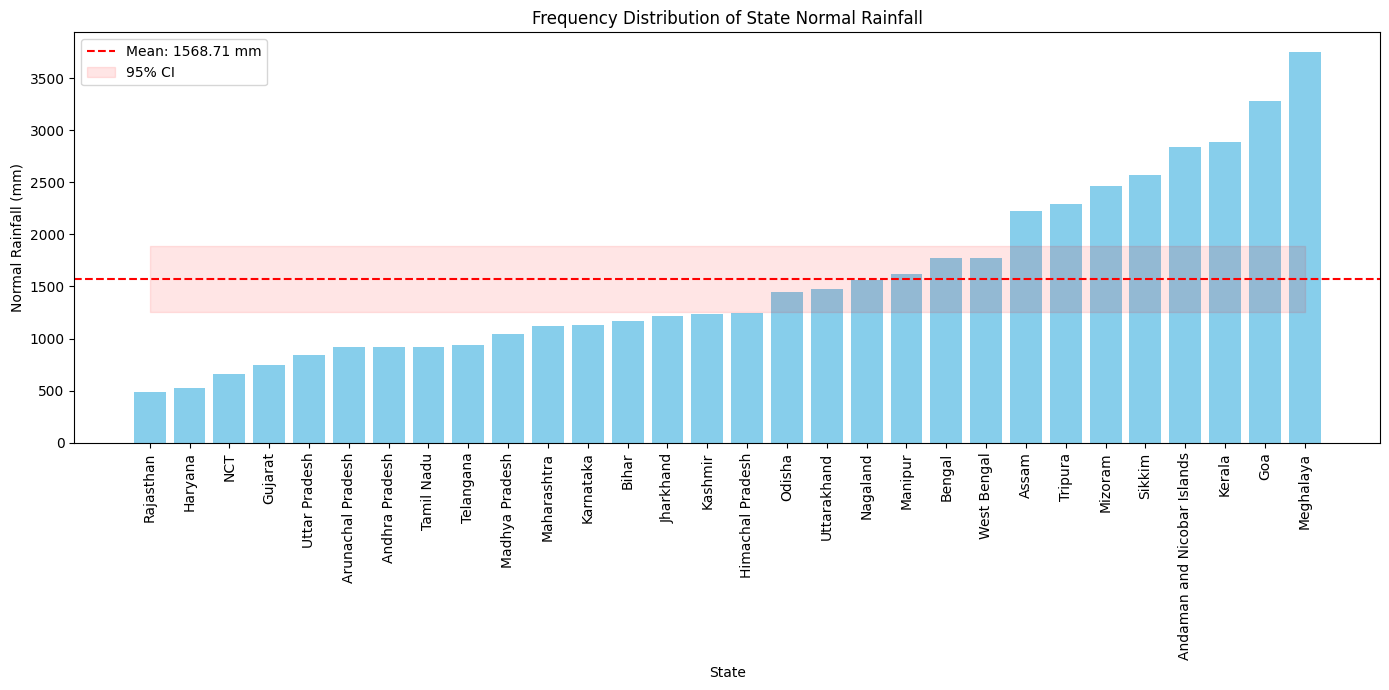

In [127]:
# Function to calculate 95% confidence interval
def conf_interval(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
    return mean, ci

# Initialize plot
plt.figure(figsize=(14, 7))

# Plot the frequency distribution
rainfall_df.sort_values('state_normal_rain_mm', inplace=True)
plt.bar(rainfall_df['state'], rainfall_df['state_normal_rain_mm'], color='skyblue')
mean_rainfall, ci_rainfall = conf_interval(rainfall_df['state_normal_rain_mm'])
plt.axhline(mean_rainfall, color='r', linestyle='--', label=f'Mean: {mean_rainfall:.2f} mm')
#plt.axhline(np.median(rainfall_df['state_normal_rain_mm']), color='g', linestyle='-', label=f'Median: {np.median(rainfall_df['state_normal_rain_mm']):.2f} mm')
plt.fill_between([0, len(rainfall_df)-1], ci_rainfall[0], ci_rainfall[1], color='r', alpha=0.1, label='95% CI')

plt.title('Frequency Distribution of State Normal Rainfall')
plt.xlabel('State')
plt.ylabel('Normal Rainfall (mm)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()


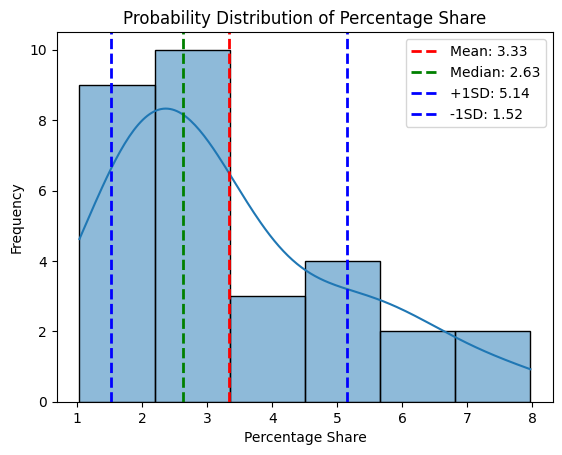

In [130]:
#Using dataframe rainfall_df a pdf indicating percentage

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Calculate the mean, median, and standard deviation
mean_percentage_share = rainfall_df['percentage_share'].mean()
median_percentage_share = rainfall_df['percentage_share'].median()
sd_percentage_share = rainfall_df['percentage_share'].std()

# Create a histogram of the percentage share
sns.histplot(rainfall_df['percentage_share'], kde=True)
plt.axvline(mean_percentage_share, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_percentage_share:.2f}')
plt.axvline(median_percentage_share, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_percentage_share:.2f}')
plt.axvline(mean_percentage_share + sd_percentage_share, color='blue', linestyle='dashed', linewidth=2, label=f'+1SD: {mean_percentage_share + sd_percentage_share:.2f}')
plt.axvline(mean_percentage_share - sd_percentage_share, color='blue', linestyle='dashed', linewidth=2, label=f'-1SD: {mean_percentage_share - sd_percentage_share:.2f}')
plt.xlabel('Percentage Share')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Percentage Share')
plt.legend()
plt.show()


Above datea is right skewed, ie., right side tail is elongated pulling the mean to the right beyond median.

In [120]:
rainfall_df.dtypes

,0
state,object
state_normal_rain_mm,float64


In [123]:
# Merging the rainfall data with india_data
india_data = india_data.merge(rainfall_df, left_on='admin_division_name', right_on='state', how='left')

# Display the updated DataFrame
print(india_data[['admin_division_name', 'state_normal_rain_mm']].head())

  admin_division_name  state_normal_rain_mm
0              Bengal                1772.9
1              Bengal                1772.9
2             Manipur                1623.0
3         Uttarakhand                1477.6
4             Kashmir                1232.3


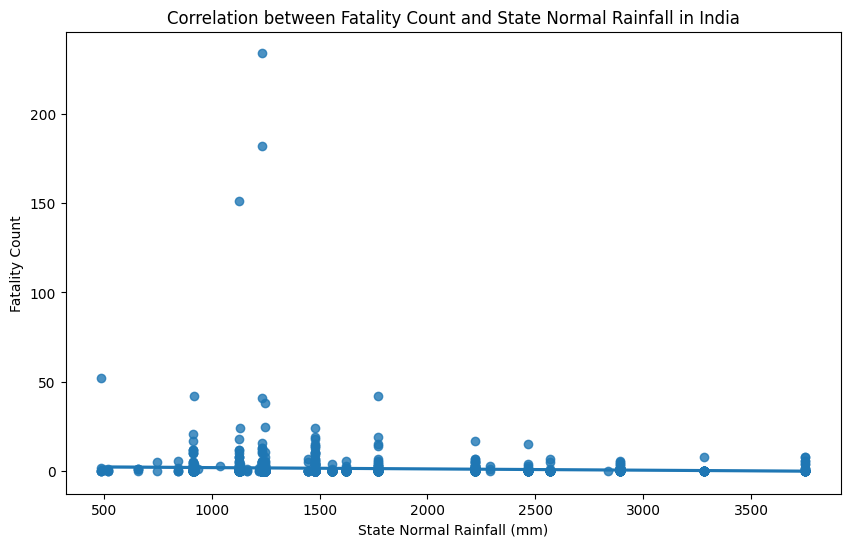

In [134]:
#corelation via scatter plot on the fatality_count vs state_normal_rain_mm

# Drop rows with NaN values in the relevant columns
india_data = india_data.dropna(subset=['fatality_count', 'state_normal_rain_mm'])


# Create a scatter plot with linear regression
plt.figure(figsize=(10, 6))
sns.regplot(x='state_normal_rain_mm', y='fatality_count', data=india_data)

# Add labels and title
plt.xlabel('State Normal Rainfall (mm)')
plt.ylabel('Fatality Count')
plt.title('Correlation between Fatality Count and State Normal Rainfall in India')

plt.show()


In [135]:
# co-efficient between rainfall level vs fatality count

# Dropping rows with NaN values in the relevant columns
india_data = india_data.dropna(subset=['fatality_count', 'state_normal_rain_mm'])

# Calculate the correlation coefficient
correlation_coefficient = india_data['fatality_count'].corr(india_data['state_normal_rain_mm'])

print(f"Correlation coefficient between fatality count and state normal rainfall: {correlation_coefficient:.4f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(india_data['state_normal_rain_mm'], india_data['fatality_count'])

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")


Correlation coefficient between fatality count and state normal rainfall: -0.0455
Slope: -0.0007
Intercept: 2.7638
R-value (correlation coefficient): -0.0455
P-value: 0.1084
Standard Error: 0.0004


Correlation coefficient between rainfall level and fatality count: -0.0455


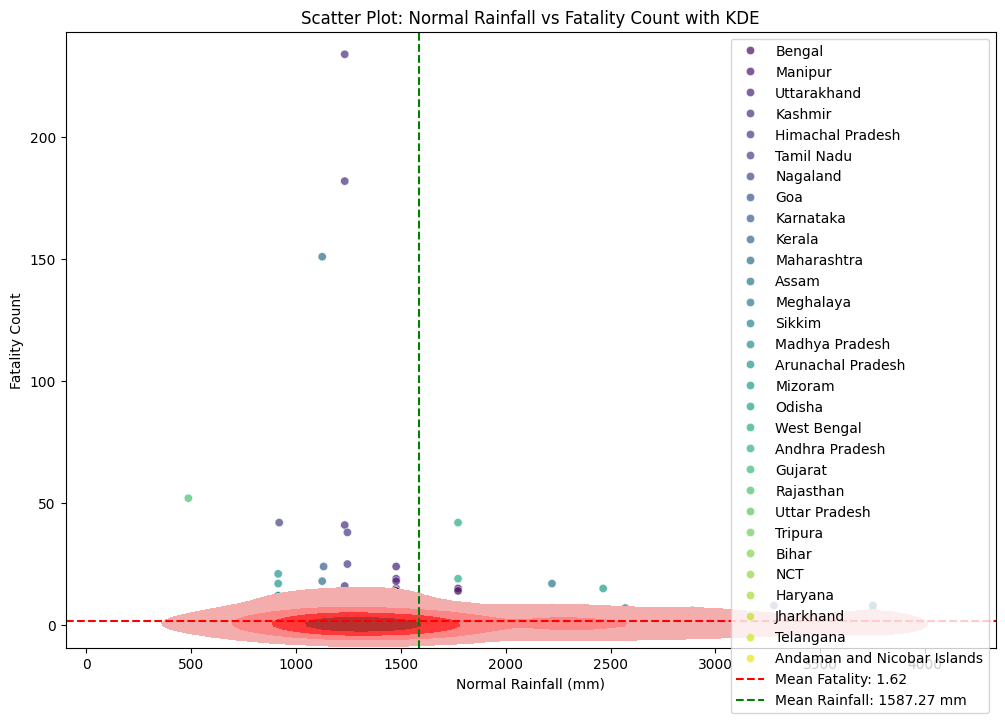

In [156]:
# Calculate correlation coefficient
correlation = india_data[['state_normal_rain_mm', 'fatality_count']].corr().iloc[0, 1]
print(f"Correlation coefficient between rainfall level and fatality count: {correlation:.4f}")

# Calculate mean values
mean_fatality_count = np.mean(india_data['fatality_count'])
mean_rainfall = np.mean(india_data['state_normal_rain_mm'])

# Create scatter plot with KDE and hue
plt.figure(figsize=(12, 8))
sns.scatterplot(x='state_normal_rain_mm', y='fatality_count', hue='admin_division_name', data=india_data, alpha=0.7, palette='viridis')
sns.kdeplot(x=india_data['state_normal_rain_mm'], y=india_data['fatality_count'], color='red', levels=5, fill=True)
plt.xlabel('Normal Rainfall (mm)')
plt.ylabel('Fatality Count')
plt.title('Scatter Plot: Normal Rainfall vs Fatality Count with KDE')
plt.axhline(y=mean_fatality_count, color='r', linestyle='--', label=f'Mean Fatality: {mean_fatality_count:.2f}')
plt.axvline(x=mean_rainfall, color='g', linestyle='--', label=f'Mean Rainfall: {mean_rainfall:.2f} mm')
plt.legend()
plt.show()

In [158]:
# Group by 'admin_division_name' , landslide_size and 'year' to get the sum of 'fatality_count'
grouped_data_size = india_data.groupby(['admin_division_name', 'landslide_size','landslide_category', 'year'])['fatality_count'].sum().reset_index()

# Sort and get top 5 per year
#top_5_per_year = grouped_data.groupby('year').apply(lambda x: x.nlargest(5, 'fatality_count')).reset_index(drop=True)

# Display the table
#print(top_5_per_year)

# Create a sunburst chart
fig = px.sunburst(grouped_data_size, path=['year','landslide_size','landslide_category', 'admin_division_name'], values='fatality_count',
                  title='Sunburst Chart of Fatality Count by Year and Admin Division in India')


fig.show()

In [173]:
# Ensure the data is sorted by year in ascending order
india_data.sort_values(by='year', ascending=True, inplace=True)

# Ensure the required columns are present
required_columns = ['longitude', 'latitude', 'fatality_count', 'landslide_size']

# Create a Plotly scatter map
fig = px.scatter_mapbox(india_data,
                        lat=india_data['latitude'],
                        lon=india_data['longitude'],
                        size=india_data['fatality_count'],
                        color=india_data['landslide_size'],
                        hover_name=india_data['admin_division_name'],
                        size_max=15,
                        zoom=2.7,
                        mapbox_style="carto-positron",
                        title="Landslide Fatalities and Sizes in India")
#                        animation_frame='year')  # Add animation by year

    # Update the layout
#fig.update_layout(title='Map of Fatalities',mapbox=dict(center=dict(lat=0, lon=0), zoom=2))

fig.show()

In [175]:

# Create a Plotly scatter map
fig = px.scatter_mapbox(india_data,
                        lat=india_data['latitude'],
                        lon=india_data['longitude'],
                        size=india_data['fatality_count'],
                        color=india_data['landslide_size'],
                        hover_name=india_data['admin_division_name'],
                        size_max=15,
                        zoom=2.4,
                        mapbox_style="carto-positron",
                        title="Landslide Fatalities and Sizes in India",
                        animation_frame='year')  # Add animation by year

    # Update the layout
#fig.update_layout(title='Map of Fatalities',mapbox=dict(center=dict(lat=0, lon=0), zoom=2))

fig.show()